# Tensorflow Tutorial


In [125]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)


Epoch 1/5
60000/60000 [==============================] - 17s 287us/step - loss: 0.2038 - acc: 0.9407
Epoch 2/5
60000/60000 [==============================] - 19s 313us/step - loss: 0.0789 - acc: 0.9760
Epoch 3/5
60000/60000 [==============================] - 17s 281us/step - loss: 0.0506 - acc: 0.9844
Epoch 4/5
60000/60000 [==============================] - 17s 279us/step - loss: 0.0370 - acc: 0.9881
Epoch 5/5
10000/10000 [==============================] - 1s 112us/step


[0.06298007403314114, 0.9814]

In [5]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [0]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [0]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

# Basic Classification

In [8]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.11.0-rc2


In [9]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
train_images.shape

(60000, 28, 28)

In [13]:
len(train_labels)

60000

In [14]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
test_images.shape

(10000, 28, 28)

In [17]:
len(test_labels)

10000

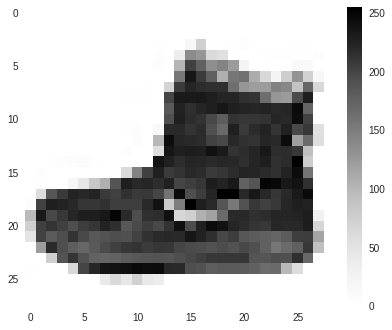

In [18]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [0]:
train_images = train_images / 255.0

In [0]:
test_images = test_images / 255.0

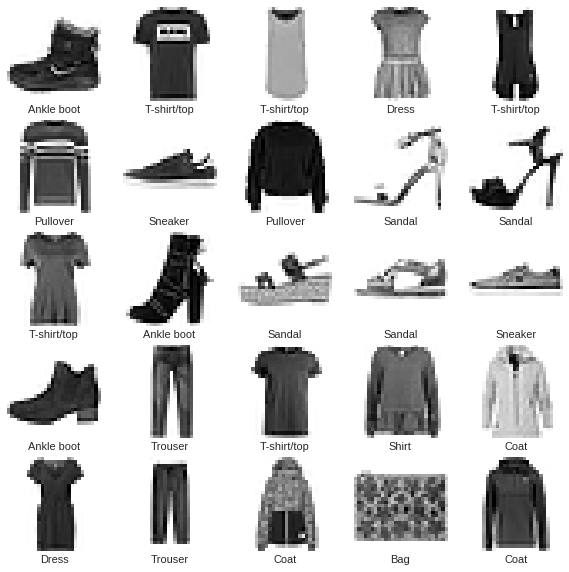

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.4959 - acc: 0.8266
Epoch 2/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.3757 - acc: 0.8633
Epoch 3/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.3356 - acc: 0.8774
Epoch 4/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.3119 - acc: 0.8849
Epoch 5/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.2944 - acc: 0.8921


In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 32us/step


In [28]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8775


In [0]:
predictions = model.predict(test_images)

In [30]:
predictions[0]

array([1.19849728e-05, 2.62903200e-07, 1.18187465e-07, 8.89336107e-08,
       4.40035046e-06, 1.37922252e-02, 4.50115266e-07, 9.40888599e-02,
       5.26017793e-05, 8.92048955e-01], dtype=float32)

In [31]:
np.argmax(predictions[0])


9

In [32]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

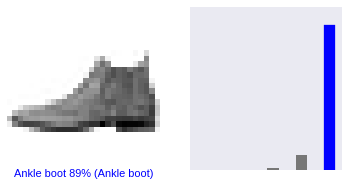

In [34]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

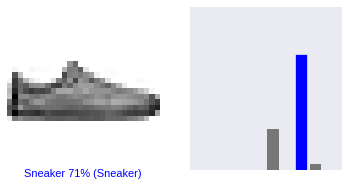

In [35]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

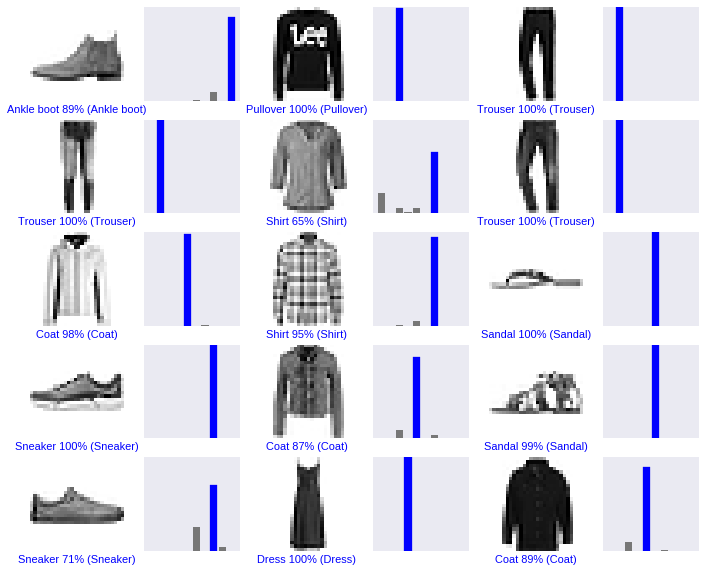

In [36]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [37]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [38]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


In [39]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.1984971e-05 2.6290317e-07 1.1818768e-07 8.8933433e-08 4.4003500e-06
  1.3792236e-02 4.5011475e-07 9.4088934e-02 5.2601772e-05 8.9204884e-01]]


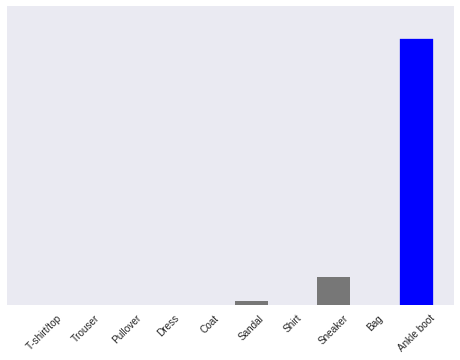

In [40]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [41]:
np.argmax(predictions_single[0])

9

IMDB Test Classification

In [42]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)


1.11.0-rc2


In [43]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [46]:
len(train_data[0])

218

In [44]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [47]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [48]:
len(train_data[0]), len(train_data[1])

(218, 189)

In [49]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

1646592/1641221 [==============================] - 0s 0us/step


In [50]:
word_index

{'fawn': 34704,
 'tsukino': 52009,
 'nunnery': 52010,
 'sonja': 16819,
 'vani': 63954,
 'woods': 1411,
 'spiders': 16118,
 'hanging': 2348,
 'woody': 2292,
 'trawling': 52011,
 "hold's": 52012,
 'comically': 11310,
 'localized': 40833,
 'disobeying': 30571,
 "'royale": 52013,
 "harpo's": 40834,
 'canet': 52014,
 'aileen': 19316,
 'acurately': 52015,
 "diplomat's": 52016,
 'rickman': 25245,
 'arranged': 6749,
 'rumbustious': 52017,
 'familiarness': 52018,
 "spider'": 52019,
 'hahahah': 68807,
 "wood'": 52020,
 'transvestism': 40836,
 "hangin'": 34705,
 'bringing': 2341,
 'seamier': 40837,
 'wooded': 34706,
 'bravora': 52021,
 'grueling': 16820,
 'wooden': 1639,
 'wednesday': 16821,
 "'prix": 52022,
 'altagracia': 34707,
 'circuitry': 52023,
 'crotch': 11588,
 'busybody': 57769,
 "tart'n'tangy": 52024,
 'burgade': 14132,
 'thrace': 52026,
 "tom's": 11041,
 'snuggles': 52028,
 'francesco': 29117,
 'complainers': 52030,
 'templarios': 52128,
 '272': 40838,
 '273': 52031,
 'zaniacs': 52133,

In [51]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [0]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)


In [53]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [54]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [55]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [58]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 75us/step - loss: 0.6906 - acc: 0.6231 - val_loss: 0.6872 - val_acc: 0.6695
Epoch 2/40
15000/15000 [==============================] - 1s 61us/step - loss: 0.6810 - acc: 0.7381 - val_loss: 0.6749 - val_acc: 0.7367
Epoch 3/40
15000/15000 [==============================] - 1s 59us/step - loss: 0.6633 - acc: 0.7652 - val_loss: 0.6539 - val_acc: 0.7601
Epoch 4/40
15000/15000 [==============================] - 1s 59us/step - loss: 0.6353 - acc: 0.7761 - val_loss: 0.6245 - val_acc: 0.7769
Epoch 5/40
15000/15000 [==============================] - 1s 60us/step - loss: 0.5981 - acc: 0.8031 - val_loss: 0.5865 - val_acc: 0.7940
Epoch 6/40
15000/15000 [==============================] - 1s 58us/step - loss: 0.5546 - acc: 0.8225 - val_loss: 0.5457 - val_acc: 0.8087
Epoch 7/40
15000/15000 [==============================] - 1s 58us/step - loss: 0.5085 - acc: 0.8389 - val_loss: 0.5044 - val_acc

In [59]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 1s 38us/step
[0.3268502438783646, 0.87244]


And let's see how the model performs. Two values will be returned. Loss (a number which represents our error, lower values are better), and accuracy. This fairly naive approach achieves an accuracy of about 87%. With more advanced approaches, the model should get closer to 95%

In [62]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

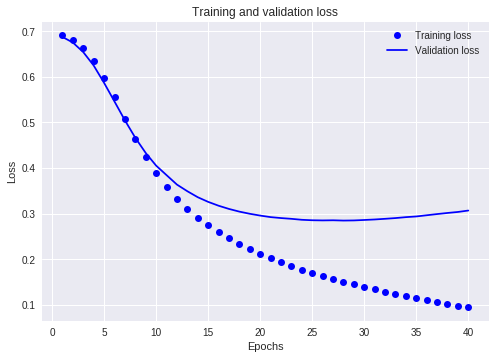

In [63]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

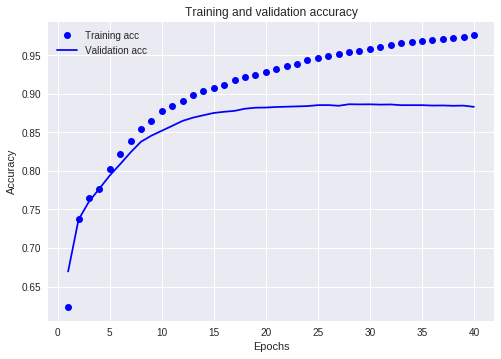

In [64]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Regression Problem

In [66]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.11.0-rc2


In [68]:
boston_housing = keras.datasets.boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# Shuffle the training set
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

57344/57026 [==============================] - 0s 0us/step


In [69]:
print("Training set: {}".format(train_data.shape))  # 404 examples, 13 features
print("Testing set:  {}".format(test_data.shape))   # 102 examples, 13 features

Training set: (404, 13)
Testing set:  (102, 13)


In [70]:
print(train_data[0])  # Display sample features, notice the different scales

[7.8750e-02 4.5000e+01 3.4400e+00 0.0000e+00 4.3700e-01 6.7820e+00
 4.1100e+01 3.7886e+00 5.0000e+00 3.9800e+02 1.5200e+01 3.9387e+02
 6.6800e+00]


In [76]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.397253,1.412057,-1.126646,-0.256833,-1.027385,0.726354,-1.000164,0.023834,-0.511142,-0.047533,-1.490674,0.415841,-0.836487
1,0.087846,-0.483615,1.028326,-0.256833,1.371293,-3.817250,0.676891,-1.049006,1.675886,1.565287,0.784476,-0.000885,-0.775760
2,-0.395379,1.201427,-0.690066,-0.256833,-0.942023,0.827918,-0.939245,0.259915,-0.626249,-0.914123,-0.398602,0.448077,-1.347144
3,-0.403759,3.097099,-1.022279,-0.256833,-1.095675,0.351129,-1.480347,2.364762,-0.626249,-0.330379,-0.262093,0.400521,-0.880652
4,-0.348692,-0.483615,-0.720935,-0.256833,-0.455458,3.467186,0.501302,-0.417158,-0.165822,-0.595170,-0.489608,0.289557,-1.119419


In [77]:
train_data.shape

(404, 13)

In [72]:
print(train_labels[0:10])  # Display first 10 entries

[32.  27.5 32.  23.1 50.  20.6 22.6 36.2 21.8 19.5]


In [73]:
# Test data is *not* used when calculating the mean and std

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

print(train_data[0])  # First training sample, normalized

[-0.39725269  1.41205707 -1.12664623 -0.25683275 -1.027385    0.72635358
 -1.00016413  0.02383449 -0.51114231 -0.04753316 -1.49067405  0.41584124
 -0.83648691]


In [74]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

# Store training stats
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

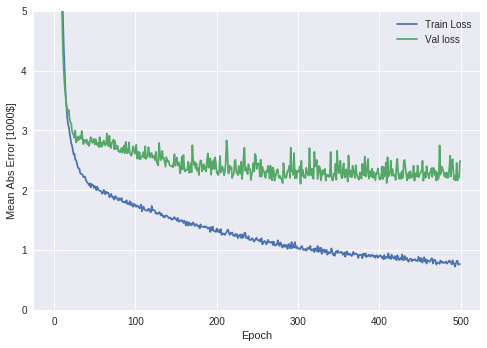

In [78]:
import matplotlib.pyplot as plt


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 5])

plot_history(history)


....................................................................................................
.........................................

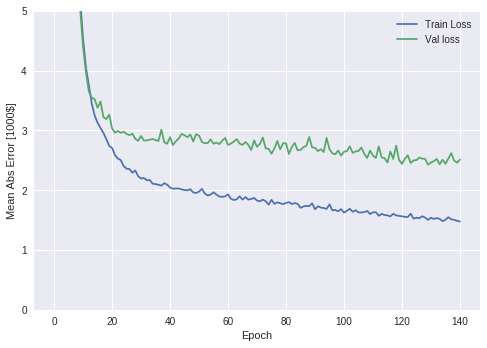

In [79]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)

In [80]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error: $2905.03


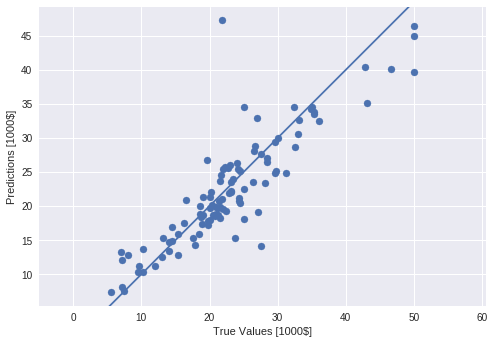

In [81]:
test_predictions = model.predict(test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

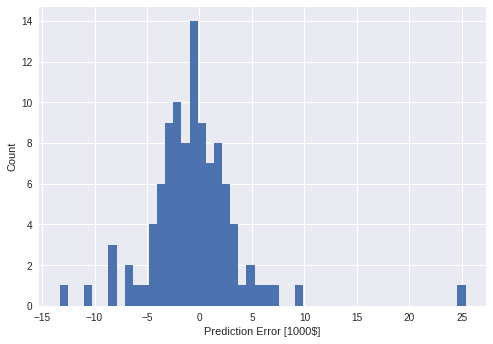

In [82]:
error = test_predictions - test_labels
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [1000$]")
_ = plt.ylabel("Count")

### Overfitting and Dropout

In [91]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.11.0-rc2


In [0]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

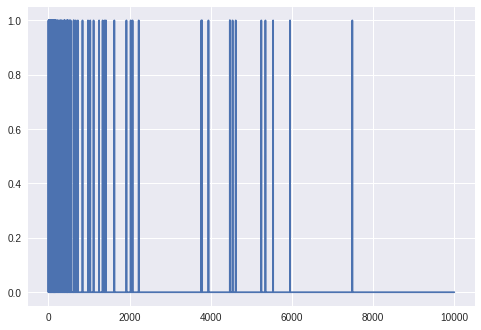

In [93]:
plt.plot(train_data[0])

The simplest way to prevent overfitting is to reduce the size of the model, i.e. the number of learnable parameters in the model (which is determined by the number of layers and the number of units per layer). In deep learning, the number of learnable parameters in a model is often referred to as the model's "capacity". Intuitively, a model with more parameters will have more "memorization capacity" and therefore will be able to easily learn a perfect dictionary-like mapping between training samples and their targets, a mapping without any generalization power, but this would be useless when making predictions on previously unseen data.

Always keep this in mind: deep learning models tend to be good at fitting to the training data, but the real challenge is generalization, not fitting.

On the other hand, if the network has limited memorization resources, it will not be able to learn the mapping as easily. To minimize its loss, it will have to learn compressed representations that have more predictive power. At the same time, if you make your model too small, it will have difficulty fitting to the training data. There is a balance between "too much capacity" and "not enough capacity".

Unfortunately, there is no magical formula to determine the right size or architecture of your model (in terms of the number of layers, or what the right size for each layer). You will have to experiment using a series of different architectures.

To find an appropriate model size, it's best to start with relatively few layers and parameters, then begin increasing the size of the layers or adding new layers until you see diminishing returns on the validation loss. Let's try this on our movie review classification network.

We'll create a simple model using only Dense layers as a baseline, then create smaller and larger versions, and compare them.

In [94]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_25 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [95]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.4764 - acc: 0.7886 - binary_crossentropy: 0.4764 - val_loss: 0.3229 - val_acc: 0.8802 - val_binary_crossentropy: 0.3229
Epoch 2/20
 - 4s - loss: 0.2361 - acc: 0.9144 - binary_crossentropy: 0.2361 - val_loss: 0.2841 - val_acc: 0.8888 - val_binary_crossentropy: 0.2841
Epoch 3/20
 - 4s - loss: 0.1698 - acc: 0.9418 - binary_crossentropy: 0.1698 - val_loss: 0.2954 - val_acc: 0.8837 - val_binary_crossentropy: 0.2954
Epoch 4/20
 - 4s - loss: 0.1328 - acc: 0.9562 - binary_crossentropy: 0.1328 - val_loss: 0.3250 - val_acc: 0.8768 - val_binary_crossentropy: 0.3250
Epoch 5/20
 - 4s - loss: 0.1079 - acc: 0.9652 - binary_crossentropy: 0.1079 - val_loss: 0.3567 - val_acc: 0.8716 - val_binary_crossentropy: 0.3567
Epoch 6/20
 - 4s - loss: 0.0841 - acc: 0.9752 - binary_crossentropy: 0.0841 - val_loss: 0.3920 - val_acc: 0.8675 - val_binary_crossentropy: 0.3920
Epoch 7/20
 - 4s - loss: 0.0639 - acc: 0.9839 - binary_crossentropy:

In [96]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 4)                 40004     
_________________________________________________________________
dense_28 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [97]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5817 - acc: 0.7784 - binary_crossentropy: 0.5817 - val_loss: 0.4808 - val_acc: 0.8513 - val_binary_crossentropy: 0.4808
Epoch 2/20
 - 4s - loss: 0.3843 - acc: 0.8830 - binary_crossentropy: 0.3843 - val_loss: 0.3592 - val_acc: 0.8732 - val_binary_crossentropy: 0.3592
Epoch 3/20
 - 4s - loss: 0.2828 - acc: 0.9084 - binary_crossentropy: 0.2828 - val_loss: 0.3076 - val_acc: 0.8846 - val_binary_crossentropy: 0.3076
Epoch 4/20
 - 4s - loss: 0.2293 - acc: 0.9230 - binary_crossentropy: 0.2293 - val_loss: 0.2891 - val_acc: 0.8879 - val_binary_crossentropy: 0.2891
Epoch 5/20
 - 4s - loss: 0.1961 - acc: 0.9347 - binary_crossentropy: 0.1961 - val_loss: 0.2855 - val_acc: 0.8861 - val_binary_crossentropy: 0.2855
Epoch 6/20
 - 4s - loss: 0.1718 - acc: 0.9428 - binary_crossentropy: 0.1718 - val_loss: 0.2846 - val_acc: 0.8880 - val_binary_crossentropy: 0.2846
Epoch 7/20
 - 3s - loss: 0.1528 - acc: 0.9505 - binary_crossentropy:

In [98]:
# Create a bigger model
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_31 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [99]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 20s - loss: 0.3447 - acc: 0.8536 - binary_crossentropy: 0.3447 - val_loss: 0.2965 - val_acc: 0.8791 - val_binary_crossentropy: 0.2965
Epoch 2/20
 - 19s - loss: 0.1359 - acc: 0.9510 - binary_crossentropy: 0.1359 - val_loss: 0.3674 - val_acc: 0.8614 - val_binary_crossentropy: 0.3674
Epoch 3/20
 - 19s - loss: 0.0426 - acc: 0.9879 - binary_crossentropy: 0.0426 - val_loss: 0.4401 - val_acc: 0.8681 - val_binary_crossentropy: 0.4401
Epoch 4/20
 - 19s - loss: 0.0060 - acc: 0.9993 - binary_crossentropy: 0.0060 - val_loss: 0.6263 - val_acc: 0.8692 - val_binary_crossentropy: 0.6263
Epoch 5/20
 - 18s - loss: 7.1997e-04 - acc: 1.0000 - binary_crossentropy: 7.1997e-04 - val_loss: 0.7160 - val_acc: 0.8678 - val_binary_crossentropy: 0.7160
Epoch 6/20
 - 18s - loss: 7.3008e-04 - acc: 1.0000 - binary_crossentropy: 7.3008e-04 - val_loss: 0.7422 - val_acc: 0.8694 - val_binary_crossentropy: 0.7422
Epoch 7/20
 - 18s - loss: 1.2880e-04 - acc: 1.

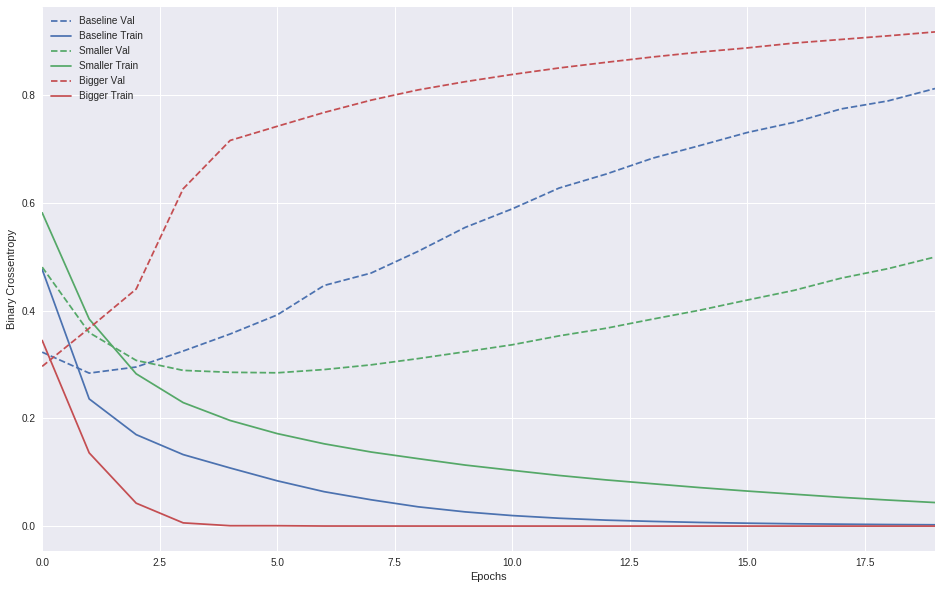

In [100]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [101]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.5344 - acc: 0.8008 - binary_crossentropy: 0.4959 - val_loss: 0.3884 - val_acc: 0.8762 - val_binary_crossentropy: 0.3488
Epoch 2/20
 - 4s - loss: 0.3088 - acc: 0.9074 - binary_crossentropy: 0.2649 - val_loss: 0.3336 - val_acc: 0.8882 - val_binary_crossentropy: 0.2863
Epoch 3/20
 - 4s - loss: 0.2554 - acc: 0.9274 - binary_crossentropy: 0.2056 - val_loss: 0.3345 - val_acc: 0.8862 - val_binary_crossentropy: 0.2827
Epoch 4/20
 - 4s - loss: 0.2292 - acc: 0.9400 - binary_crossentropy: 0.1758 - val_loss: 0.3455 - val_acc: 0.8830 - val_binary_crossentropy: 0.2910
Epoch 5/20
 - 4s - loss: 0.2151 - acc: 0.9460 - binary_crossentropy: 0.1590 - val_loss: 0.3590 - val_acc: 0.8792 - val_binary_crossentropy: 0.3020
Epoch 6/20
 - 4s - loss: 0.2013 - acc: 0.9516 - binary_crossentropy: 0.1435 - val_loss: 0.3729 - val_acc: 0.8770 - val_binary_crossentropy: 0.3147
Epoch 7/20
 - 4s - loss: 0.1930 - acc: 0.9552 - binary_crossentropy:

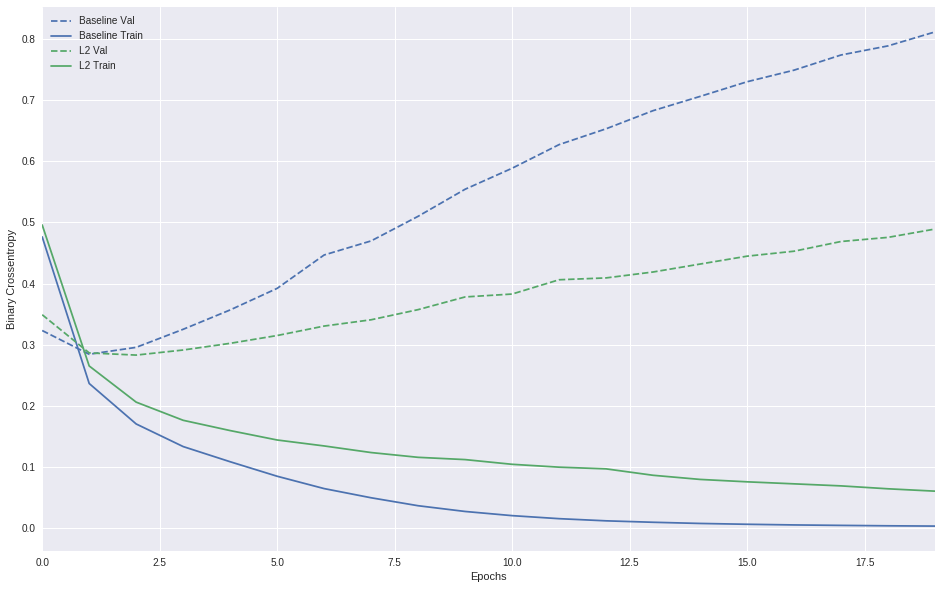

In [102]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [103]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.6212 - acc: 0.6511 - binary_crossentropy: 0.6212 - val_loss: 0.4924 - val_acc: 0.8519 - val_binary_crossentropy: 0.4924
Epoch 2/20
 - 4s - loss: 0.4600 - acc: 0.8040 - binary_crossentropy: 0.4600 - val_loss: 0.3456 - val_acc: 0.8790 - val_binary_crossentropy: 0.3456
Epoch 3/20
 - 4s - loss: 0.3599 - acc: 0.8623 - binary_crossentropy: 0.3599 - val_loss: 0.2929 - val_acc: 0.8878 - val_binary_crossentropy: 0.2929
Epoch 4/20
 - 4s - loss: 0.2962 - acc: 0.8946 - binary_crossentropy: 0.2962 - val_loss: 0.2738 - val_acc: 0.8889 - val_binary_crossentropy: 0.2738
Epoch 5/20
 - 4s - loss: 0.2496 - acc: 0.9130 - binary_crossentropy: 0.2496 - val_loss: 0.2733 - val_acc: 0.8893 - val_binary_crossentropy: 0.2733
Epoch 6/20
 - 4s - loss: 0.2193 - acc: 0.9250 - binary_crossentropy: 0.2193 - val_loss: 0.2860 - val_acc: 0.8869 - val_binary_crossentropy: 0.2860
Epoch 7/20
 - 4s - loss: 0.1900 - acc: 0.9344 - binary_crossentropy:

In [0]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

In [0]:
!pip install -q h5py pyyaml 

In [105]:
from __future__ import absolute_import, division, print_function

import os

import tensorflow as tf
from tensorflow import keras

tf.__version__

'1.11.0-rc2'

In [0]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.0
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.0

In [107]:
# Returns a short sequential model
def create_model():
  model = tf.keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  
  model.compile(optimizer=tf.keras.optimizers.Adam(), 
                loss=tf.keras.losses.sparse_categorical_crossentropy,
                metrics=['accuracy'])
  
  return model


# Create a basic model instance
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [114]:
checkpoint_path = "training_2/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose=1)

model = create_model()

model.fit(train_images, train_labels,  epochs = 10, 
          validation_data = (test_images,test_labels),
          callbacks = [cp_callback])  # pass callback to training

Train on 1000 samples, validate on 1000 samples
Epoch 1/10
 832/1000 [=======================>......] - ETA: 0s - loss: 1.2960 - acc: 0.6166
Epoch 00001: saving model to training_2/cp.ckpt

Consider using a TensorFlow optimizer from `tf.train`.
1000/1000 [==============================] - 2s 2ms/step - loss: 1.1798 - acc: 0.6540 - val_loss: 0.7056 - val_acc: 0.7800
Epoch 2/10
 832/1000 [=======================>......] - ETA: 0s - loss: 0.4311 - acc: 0.8798
Epoch 00002: saving model to training_2/cp.ckpt

Consider using a TensorFlow optimizer from `tf.train`.
1000/1000 [==============================] - 0s 361us/step - loss: 0.4254 - acc: 0.8800 - val_loss: 0.5360 - val_acc: 0.8330
Epoch 3/10
 864/1000 [========================>.....] - ETA: 0s - loss: 0.2872 - acc: 0.9236
Epoch 00003: saving model to training_2/cp.ckpt

Consider using a TensorFlow optimizer from `tf.train`.
1000/1000 [==============================] - 0s 336us/step - loss: 0.2888 - acc: 0.9240 - val_loss: 0.4645 - val_

In [115]:
!ls {checkpoint_dir}

checkpoint  cp.ckpt.data-00000-of-00001  cp.ckpt.index


In [113]:
model = create_model()

loss, acc = model.evaluate(test_images, test_labels)
print("Untrained model, accuracy: {:5.2f}%".format(100*acc))

1000/1000 [==============================] - 1s 893us/step
Untrained model, accuracy:  8.90%


In [116]:
!ls

sample_data  training_1  training_2


In [117]:
!pwd

/content


In [118]:
model.load_weights(checkpoint_path)
loss,acc = model.evaluate(test_images, test_labels)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

1000/1000 [==============================] - 0s 67us/step
Restored model, accuracy: 86.60%


**Checkpoint callback options**

The callback provides several options to give the resulting checkpoints unique names, and adjust the checkpointing frequency.

Train a new model, and save uniquely named checkpoints once every 5-epochs

In [119]:
# include the epoch in the file name. (uses `str.format`)
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, verbose=1, save_weights_only=True,
    # Save weights, every 5-epochs.
    period=5)

model = create_model()
model.fit(train_images, train_labels,
          epochs = 50, callbacks = [cp_callback],
          validation_data = (test_images,test_labels),
          verbose=0)


Epoch 00005: saving model to training_2/cp-0005.ckpt

Consider using a TensorFlow optimizer from `tf.train`.

Epoch 00010: saving model to training_2/cp-0010.ckpt

Consider using a TensorFlow optimizer from `tf.train`.

Epoch 00015: saving model to training_2/cp-0015.ckpt

Consider using a TensorFlow optimizer from `tf.train`.

Epoch 00020: saving model to training_2/cp-0020.ckpt

Consider using a TensorFlow optimizer from `tf.train`.

Epoch 00025: saving model to training_2/cp-0025.ckpt

Consider using a TensorFlow optimizer from `tf.train`.

Epoch 00030: saving model to training_2/cp-0030.ckpt

Consider using a TensorFlow optimizer from `tf.train`.

Epoch 00035: saving model to training_2/cp-0035.ckpt

Consider using a TensorFlow optimizer from `tf.train`.

Epoch 00040: saving model to training_2/cp-0040.ckpt

Consider using a TensorFlow optimizer from `tf.train`.

Epoch 00045: saving model to training_2/cp-0045.ckpt

Consider using a TensorFlow optimizer from `tf.train`.

Epoch 000

In [120]:
model = create_model()

model.fit(train_images, train_labels, epochs=5)

# Save entire model to a HDF5 file
model.save('my_model.h5')

Epoch 1/5
1000/1000 [==============================] - 1s 1ms/step - loss: 1.1940 - acc: 0.6330
Epoch 2/5
1000/1000 [==============================] - 0s 297us/step - loss: 0.4367 - acc: 0.8770
Epoch 3/5
1000/1000 [==============================] - 0s 275us/step - loss: 0.2949 - acc: 0.9270
Epoch 4/5
1000/1000 [==============================] - 0s 255us/step - loss: 0.2113 - acc: 0.9520
Epoch 5/5
1000/1000 [==============================] - 0s 253us/step - loss: 0.1598 - acc: 0.9680


In [121]:
# Recreate the exact same model, including weights and optimizer.
new_model = keras.models.load_model('my_model.h5')
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [122]:
loss, acc = new_model.evaluate(test_images, test_labels)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

1000/1000 [==============================] - 1s 525us/step
Restored model, accuracy: 85.00%


In [0]:
# 